### Data Pre-Processing and Wrangling

In [101]:
# import packages and dependencies
import pandas as pd
import numpy as np
import seaborn as sns

In [102]:
event_details = pd.read_csv('../data/raw/event_details.csv', low_memory=False)
event_details.head()

,event_id,fight_id,date,location,winner,winner_id
0,400c7b43c86d27d3,03bc32bdb5a33496,"June 21, 2025","Baku, Azerbaijan",Khalil Rountree Jr.,749f572d1d3161fb
1,400c7b43c86d27d3,a1afc16e21d1a807,"June 21, 2025","Baku, Azerbaijan",Rafael Fiziev,c814b4c899793af6
2,400c7b43c86d27d3,8e5744c664fec3e9,"June 21, 2025","Baku, Azerbaijan",Curtis Blaydes,fa6796c55d6c5440
3,400c7b43c86d27d3,36ec204f47e4d613,"June 21, 2025","Baku, Azerbaijan",Myktybek Orolbai,bf2c8e01b07d3eb1
4,400c7b43c86d27d3,7513a00037094075,"June 21, 2025","Baku, Azerbaijan",Nazim Sadykhov,ff62013d2fce6d13


In [103]:
fighter_details = pd.read_csv('../data/raw/fighter_details.csv', low_memory=False)
fighter_details.head()

,id,name,nick_name,wins,losses,draws,height,weight,reach,stance,dob,splm,str_acc,sapm,str_def,td_avg,td_avg_acc,td_def,sub_avg
0,74fefd43f073cd2f,Joe Pardo,NaN,4,6,0,185.42,95.25,NaN,Southpaw,NaN,0.00,0,0.00,0,0.00,0,0,0.0
1,8c1ca54b5089d199,Maheshate,NaN,10,4,0,182.88,70.31,180.34,Orthodox,"Dec 01, 1999",3.86,29,5.64,53,0.00,0,45,0.0
2,4234f0097c83fa62,Sijara Eubanks,SarJ,8,7,0,162.56,56.70,170.18,Orthodox,"Apr 27, 1985",4.30,43,3.43,57,1.90,44,66,0.3
3,1291edf2d566a71a,Julio Arce,NaN,19,6,0,170.18,65.77,177.80,Southpaw,"Oct 27, 1989",4.36,36,3.05,68,0.46,28,96,0.3
4,7a47e068f8017019,Val Woodburn,The Animal,7,2,0,172.72,77.11,187.96,Orthodox,"Aug 10, 1993",1.60,35,4.93,36,1.92,100,50,0.0


In [104]:
fight_details = pd.read_csv('../data/raw/fight_details.csv', low_memory=False)
fight_details.head()

,event_name,event_id,fight_id,r_name,r_id,b_name,b_id,division,title_fight,method,...,b_clinch_acc,b_ground_landed,b_ground_atmpted,b_ground_acc,b_landed_head_per,b_landed_body_per,b_landed_leg_per,b_landed_dist_per,b_landed_clinch_per,b_landed_ground_per
0,UFC Fight Night: Hill vs. Rountree Jr.,400c7b43c86d27d3,36ec204f47e4d613,Tofiq Musayev,ae81a3ac7b260411,Myktybek Orolbai,bf2c8e01b07d3eb1,catch weight,0,Submission,...,NaN,1.0,3.0,33.0,100.0,0.0,0.0,50.0,0.0,50.0
1,UFC Fight Night: Hill vs. Rountree Jr.,400c7b43c86d27d3,a1afc16e21d1a807,Rafael Fiziev,c814b4c899793af6,Ignacio Bahamondes,e4a47b07044ddd72,lightweight,0,Decision - Unanimous,...,38.0,0.0,0.0,NaN,46.0,26.0,28.0,94.0,6.0,0.0
2,UFC Fight Night: Hill vs. Rountree Jr.,400c7b43c86d27d3,7513a00037094075,Nazim Sadykhov,ff62013d2fce6d13,Nikolas Motta,37f560436d745c18,lightweight,0,KO/TKO,...,55.0,0.0,0.0,NaN,69.0,24.0,6.0,81.0,18.0,0.0
3,UFC Fight Night: Hill vs. Rountree Jr.,400c7b43c86d27d3,e512b80bbaea36c2,Seokhyeon Ko,4a07b1988477502c,Oban Elliott,6b56e94a59b7b134,welterweight,0,Decision - Unanimous,...,100.0,0.0,0.0,NaN,20.0,60.0,20.0,90.0,10.0,0.0
4,UFC Fight Night: Hill vs. Rountree Jr.,400c7b43c86d27d3,03bc32bdb5a33496,Jamahal Hill,5444c5a201d3ee5a,Khalil Rountree Jr.,749f572d1d3161fb,light heavyweight,0,Decision - Unanimous,...,NaN,0.0,0.0,NaN,29.0,41.0,29.0,100.0,0.0,0.0


Desired data format:

*Fixed fighter stats* 
Fighter | Age (as of July 2025)| Total_Fights | Wins | Losses | Draws | Height | Weight | Stance | etc.| Most Recent Summary Fight stats | 

Join with

Group of fight stats  + count of fights in UFC
Fighter |Date| *fight stats*|

In [105]:
# need to split fight data from red corner and blue corner to be grouped by fighter

In [106]:
event_details.loc[event_details['winner'].isnull()]

,event_id,fight_id,date,location,winner,winner_id
68,de277a4abcfeea46,13e2ff8b3a122094,"June 14, 2025","Atlanta, Georgia, USA",NaN,NaN
229,e6015889f50075d2,de85ef2fd4769070,"February 08, 2025","Sydney, New South Wales, Australia",NaN,NaN
512,66e0a70352fef46a,46fa8e79fe8a9539,"July 13, 2024","Denver, Colorado, USA",NaN,NaN
669,c398235fcaf8d71d,a7fd9da657bbce8e,"March 16, 2024","Las Vegas, Nevada, USA",NaN,NaN
730,eaea0fc7b76525a8,6cd542650d886c22,"February 10, 2024","Las Vegas, Nevada, USA",NaN,NaN
...,...,...,...,...,...,...
8034,afaad7d6a581e307,96c247ba0eb1ac65,"September 24, 1999","Lake Charles, Louisiana, USA",NaN,NaN
8040,afaad7d6a581e307,a1c1e3c1e9c6cf1e,"September 24, 1999","Lake Charles, Louisiana, USA",NaN,NaN
8106,29f935654825331b,2750ac5854e8b28b,"December 21, 1997","Yokohama, Kanagawa, Japan",NaN,NaN
8215,5af480a3b2e1726b,3932f8e9a74f3d11,"September 08, 1995","Buffalo, New York, USA",NaN,NaN


### Error in either match time or control time!

In [107]:
fight_details[['r_name', 'r_ctrl', 'b_ctrl',
               'match_time_sec' ,'total_rounds',
               'finish_round']].loc[fight_details['r_ctrl'] > fight_details['match_time_sec']]

,r_name,r_ctrl,b_ctrl,match_time_sec,total_rounds,finish_round
3,Seokhyeon Ko,615.0,104.0,300,3.0,3
6,Curtis Blaydes,321.0,26.0,300,3.0,3
12,Dustin Stoltzfus,311.0,201.0,300,3.0,3
21,Luana Santos,477.0,0.0,299,3.0,2
34,Jaqueline Amorim,394.0,0.0,109,3.0,2
...,...,...,...,...,...,...
8030,Kenichi Yamamoto,856.0,0.0,300,3.0,3
8037,John Lewis,200.0,3.0,13,3.0,3
8041,Jens Pulver,403.0,127.0,300,2.0,2
8043,Pat Miletich,96.0,4.0,94,5.0,2


In [108]:
fight_details[['r_name', 'r_ctrl', 'b_ctrl',
               'match_time_sec' ,'total_rounds',
               'finish_round']].loc[fight_details['total_rounds'] == fight_details['finish_round']]

,r_name,r_ctrl,b_ctrl,match_time_sec,total_rounds,finish_round
1,Rafael Fiziev,103.0,73.0,300,3.0,3
3,Seokhyeon Ko,615.0,104.0,300,3.0,3
4,Jamahal Hill,0.0,0.0,300,5.0,5
5,Irina Alekseeva,103.0,135.0,300,3.0,3
6,Curtis Blaydes,321.0,26.0,300,3.0,3
...,...,...,...,...,...,...
8245,Oleg Taktarov,NaN,NaN,143,1.0,1
8246,Guy Mezger,NaN,NaN,122,1.0,1
8247,Jon Hess,NaN,NaN,83,1.0,1
8248,Dan Severn,NaN,NaN,98,1.0,1


It appears match_time_sec if actually the finish time int he round, not the total fight time.
Total fight time needs to be induced from finish round. Total_rounds is better labeled ad scheduled_rounds

In [109]:
# Need create fight_time variable from finish_round and match_time_sec

def calculate_fight_time(row):
    if row['finish_round'] == 1:
        return row['match_time_sec']
    elif row['finish_round'] == 2:
        return 300 + row['match_time_sec']  # 5 minutes = 300 seconds
    elif row['finish_round'] == 3:
        return 600 + row['match_time_sec']  # 10 minutes = 600 seconds
    elif row['finish_round'] == 4:
        return 900 + row['match_time_sec']  # 15 minutes = 900 seconds
    elif row['finish_round'] == 5:
        return 1200 + row['match_time_sec']  # 20 minutes = 1200 seconds
    else:
        return np.nan  # Handle unexpected values
    
fight_details['fight_time_sec'] = fight_details.apply(calculate_fight_time, axis=1)

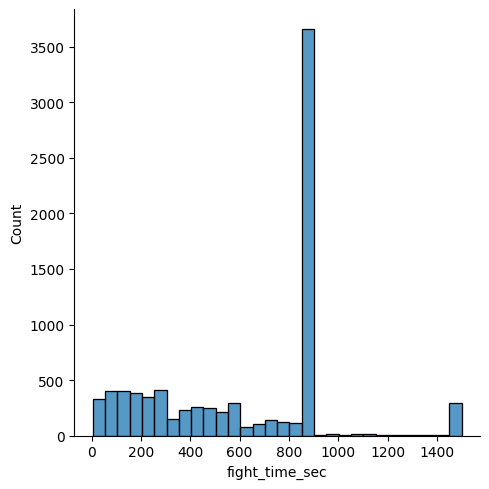

In [110]:
sns.displot(fight_details['fight_time_sec'].dropna(), bins=30);
# New variable looks reasonable, most fights end before 15 minutes

In [111]:
# check if control time is ever greater than fight time
fight_details[['r_name', 'r_ctrl', 'b_ctrl',
               'fight_time_sec' ,'total_rounds',
               'finish_round']].loc[fight_details['r_ctrl'] > fight_details['fight_time_sec']] # none found

,r_name,r_ctrl,b_ctrl,fight_time_sec,total_rounds,finish_round


<Axes: >

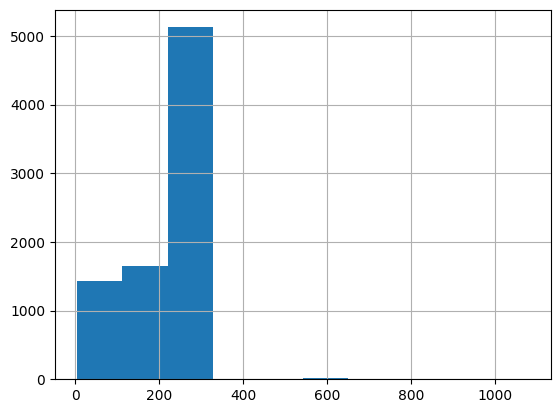

In [112]:
fight_details['match_time_sec'].hist()
# Match time does not look reliable, there are no fights lasting 900 seconds (15 minutes) which is the max time for a 3 round fight
# should match time be renamed round_finish_time?

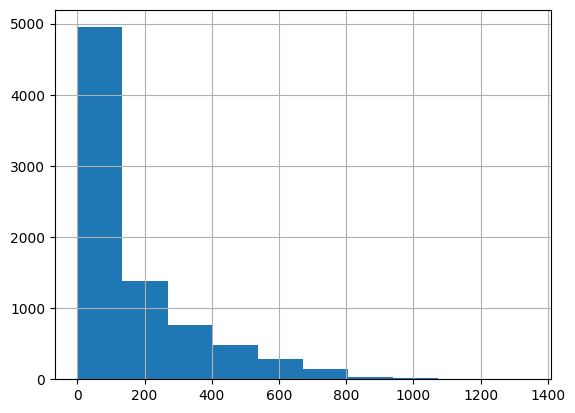

In [113]:
fight_details['r_ctrl'].hist();
# Control time looks reasonable, most fights end before 15 minutes

In [114]:
5*60

300

Max total fight time is 3 rounds of 5 minutes each = 900 seconds.
Data error appears to be in match time


Total rounds and finish time are also unreliable. Will need to be tossed and therefore per minute metrics will be unreliable

In [115]:
event_details['winner'].value_counts()

winner
Jim Miller          27
Andrei Arlovski     23
Charles Oliveira    23
Donald Cerrone      23
Max Holloway        22
                    ..
Kazushi Sakuraba     1
Tra Telligman        1
Steven Graham        1
Enson Inoue          1
Jack Nilson          1
Name: count, Length: 1811, dtype: int64

In [116]:
fight_details.method.value_counts()

method
Decision - Unanimous       2955
KO/TKO                     2589
Submission                 1607
Decision - Split            794
TKO - Doctor's Stoppage      98
Decision - Majority          95
Overturned                   57
Could Not Continue           30
DQ                           23
Other                         2
Name: count, dtype: int64

In [117]:
# Join with outcome
fights_with_winnners = fight_details.merge(event_details[['winner', 'winner_id', 'fight_id','date']], on = 'fight_id' )

# Add win/loss columns for both red and blue corners before splitting
fights_with_winnners['r_win'] = np.where(fights_with_winnners['winner_id'] == fights_with_winnners['r_id'], 1, 0)
fights_with_winnners['b_win'] = np.where(fights_with_winnners['winner_id'] == fights_with_winnners['b_id'], 1, 0)
fights_with_winnners['r_loss'] = np.where(fights_with_winnners['winner_id'] != fights_with_winnners['r_id'], 1, 0)
fights_with_winnners['b_loss'] = np.where(fights_with_winnners['winner_id'] != fights_with_winnners['b_id'], 1, 0)

# Select relevant fighter-level data
red_fighter_df = fights_with_winnners.rename(columns={"r_name": "name"}).drop(columns=[col for col in fights_with_winnners.columns if "b" in col])
blue_fighter_df = fights_with_winnners.rename(columns={"b_name": "name"}).drop(columns=[col for col in fights_with_winnners.columns if "r" in col])

# Standardize column names by removing "Red" and "Blue" prefixes
red_fighter_df.columns = [col.replace("r_", "") for col in red_fighter_df.columns]
blue_fighter_df.columns = [col.replace("b_", "") for col in blue_fighter_df.columns]

# Combine datasets
fighter_df = pd.concat([red_fighter_df, blue_fighter_df])

# Drop duplicate columns that were merged (handling NaN issue)
fighter_df = fighter_df.loc[:, ~fighter_df.columns.duplicated()]

# Display final dataset
print(fighter_df.head())

                               event_name          event_id          fight_id  \
0  UFC Fight Night: Hill vs. Rountree Jr.  400c7b43c86d27d3  36ec204f47e4d613   
1  UFC Fight Night: Hill vs. Rountree Jr.  400c7b43c86d27d3  a1afc16e21d1a807   
2  UFC Fight Night: Hill vs. Rountree Jr.  400c7b43c86d27d3  7513a00037094075   
3  UFC Fight Night: Hill vs. Rountree Jr.  400c7b43c86d27d3  e512b80bbaea36c2   
4  UFC Fight Night: Hill vs. Rountree Jr.  400c7b43c86d27d3  03bc32bdb5a33496   

             name                id           division  title_fight  \
0   Tofiq Musayev  ae81a3ac7b260411       catch weight            0   
1   Rafael Fiziev  c814b4c899793af6        lightweight            0   
2  Nazim Sadykhov  ff62013d2fce6d13        lightweight            0   
3    Seokhyeon Ko  4a07b1988477502c       welterweight            0   
4    Jamahal Hill  5444c5a201d3ee5a  light heavyweight            0   

                 method  finish_round  match_time_sec  ...  fight_time_sec  \
0       

In [118]:
fighter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16500 entries, 0 to 8249
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   event_name         16500 non-null  object 
 1   event_id           16500 non-null  object 
 2   fight_id           16500 non-null  object 
 3   name               16500 non-null  object 
 4   id                 16500 non-null  object 
 5   division           16500 non-null  object 
 6   title_fight        16500 non-null  int64  
 7   method             16500 non-null  object 
 8   finish_round       8250 non-null   float64
 9   match_time_sec     16500 non-null  int64  
 10  total_rounds       8219 non-null   float64
 11  referee            8224 non-null   object 
 12  kd                 16458 non-null  float64
 13  sig_stlanded       8229 non-null   float64
 14  sig_statmpted      8229 non-null   float64
 15  sig_stacc          8191 non-null   float64
 16  total_stlanded     8229 non-

clean fighter dataset and prepare for aggregation

In [119]:
# drop extraneous columns
cols_to_drop = ['event_name', 'event_id', 'title_fight', 
                'referee', 'winner' , 'winneid', 'date',
                'total_rounds']

fighter_df.drop(cols_to_drop, axis=1, inplace = True)

In [120]:
def aggregate_fighter_stats(df):
    """
    Aggregate fighter statistics to one row per fighter.
    
    Args:
        df: DataFrame with fight-level statistics
    
    Returns:
        DataFrame with one row per fighter containing aggregated statistics
    """
    
    # Create method groupings for better clustering features
    def categorize_method(method):
        """Group fight methods into broader categories"""
        if pd.isna(method):
            return 'Other'
        method = str(method).strip()
        
        if 'KO' in method or 'TKO' in method:
            return 'KO/TKO'
        elif 'Submission' in method:
            return 'Submission'
        elif 'Decision' in method:
            return 'Decision'
        elif method in ['Could Not Continue', "TKO - Doctor's Stoppage"]:
            return 'Stoppage'
        elif method in ['DQ', 'Overturned']:
            return 'DQ/Overturned'
        else:
            return 'Other'
    
    # Add method categories to dataframe
    df_copy = df.copy()
    df_copy['method_category'] = df_copy['method'].apply(categorize_method)
    
    # Define aggregation functions for each column
    agg_dict = {
        # Basic fight information
        'fight_id': 'count',  # Total number of fights
        # 'title_fight': 'sum',  # Total title fights
        'win': 'sum',  # Total wins
        'loss': 'sum',  # Total losses
        
        # Time-based metrics - sum totals, then can calculate averages later
        # 'match_time_sec': 'sum',  # Misleading, see above
        'fight_time_sec': 'sum',  # Total fight time in seconds
        # 'total_rounds': 'sum',  # misleading, see above
        'finish_round': 'sum',  # Total rounds finished (not decisions)
        
        # Event counts - sum across all fights
        'kd': 'sum',  # Total knockdowns dealt
        
        # Strike totals - sum for career totals
        'sig_stlanded': 'sum',  # Total significant strikes landed
        'sig_statmpted': 'sum',  # Total significant strikes attempted
        'total_stlanded': 'sum',  # Total strikes landed
        'total_statmpted': 'sum',  # Total strikes attempted
        
        # Takedown totals - sum for career totals
        'td_landed': 'sum',  # Total takedowns landed
        'td_atmpted': 'sum',  # Total takedowns attempted
        
        # Control time - sum for total career control time
        'ctrl': 'sum',  # Total control time
        
        # Strike location totals - sum for career totals
        'head_landed': 'sum',
        'head_atmpted': 'sum',
        'body_landed': 'sum',
        'body_atmpted': 'sum',
        'leg_landed': 'sum',
        'leg_atmpted': 'sum',
        
        # Strike position totals - sum for career totals
        'dist_landed': 'sum',  # Distance strikes landed
        'dist_atmpted': 'sum',  # Distance strikes attempted
        'clinch_landed': 'sum',  # Clinch strikes landed
        'clinch_atmpted': 'sum',  # Clinch strikes attempted
        'ground_landed': 'sum',  # Ground strikes landed
        'ground_atmpted': 'sum',  # Ground strikes attempted
        
        # Submission attempts
        'suatt': 'sum',  # Total submission attempts
        
        # Percentages and accuracy - we'll recalculate these from totals
        # Don't aggregate the existing percentage columns directly as they're per-fight
        
        # Keep fighter metadata (take first occurrence)
        'name': 'first',
        'division': 'last',  # Use last in case fighter changed divisions
    }
    
    # Group by fighter and aggregate
    fighter_stats = df_copy.groupby('id').agg(agg_dict).reset_index()
    
    # Add win/loss by method features
    # Create separate dataframes for wins and losses by method
    wins_by_method = df_copy[df_copy['win'] == 1].groupby(['id', 'method_category']).size().unstack(fill_value=0)
    wins_by_method.columns = [f'wins_by_{col.lower().replace("/", "_").replace(" ", "_")}' for col in wins_by_method.columns]
    
    losses_by_method = df_copy[df_copy['loss'] == 1].groupby(['id', 'method_category']).size().unstack(fill_value=0)
    losses_by_method.columns = [f'losses_by_{col.lower().replace("/", "_").replace(" ", "_")}' for col in losses_by_method.columns]
    
    # Merge the method breakdowns with main stats
    fighter_stats = fighter_stats.merge(wins_by_method, left_on='id', right_index=True, how='left')
    fighter_stats = fighter_stats.merge(losses_by_method, left_on='id', right_index=True, how='left')
    
    # Fill NaN values with 0 for method columns
    method_columns = [col for col in fighter_stats.columns if 'wins_by_' in col or 'losses_by_' in col]
    fighter_stats[method_columns] = fighter_stats[method_columns].fillna(0)
    
    # Rename the fight_id count to total_fights for clarity
    fighter_stats = fighter_stats.rename(columns={'fight_id': 'total_fights'})
    
    # Calculate derived metrics from aggregated totals
    
    # Overall accuracy percentages (recalculated from career totals)
    fighter_stats['career_sig_st_acc'] = np.where(
        fighter_stats['sig_statmpted'] > 0,
        (fighter_stats['sig_stlanded'] / fighter_stats['sig_statmpted']) * 100,
        0
    )
    
    fighter_stats['career_total_st_acc'] = np.where(
        fighter_stats['total_statmpted'] > 0,
        (fighter_stats['total_stlanded'] / fighter_stats['total_statmpted']) * 100,
        0
    )
    
    fighter_stats['career_td_acc'] = np.where(
        fighter_stats['td_atmpted'] > 0,
        (fighter_stats['td_landed'] / fighter_stats['td_atmpted']) * 100,
        0
    )
    
    fighter_stats['career_head_acc'] = np.where(
        fighter_stats['head_atmpted'] > 0,
        (fighter_stats['head_landed'] / fighter_stats['head_atmpted']) * 100,
        0
    )
    
    fighter_stats['career_body_acc'] = np.where(
        fighter_stats['body_atmpted'] > 0,
        (fighter_stats['body_landed'] / fighter_stats['body_atmpted']) * 100,
        0
    )
    
    fighter_stats['career_leg_acc'] = np.where(
        fighter_stats['leg_atmpted'] > 0,
        (fighter_stats['leg_landed'] / fighter_stats['leg_atmpted']) * 100,
        0
    )
    
    fighter_stats['career_dist_acc'] = np.where(
        fighter_stats['dist_atmpted'] > 0,
        (fighter_stats['dist_landed'] / fighter_stats['dist_atmpted']) * 100,
        0
    )
    
    fighter_stats['career_clinch_acc'] = np.where(
        fighter_stats['clinch_atmpted'] > 0,
        (fighter_stats['clinch_landed'] / fighter_stats['clinch_atmpted']) * 100,
        0
    )
    
    fighter_stats['career_ground_acc'] = np.where(
        fighter_stats['ground_atmpted'] > 0,
        (fighter_stats['ground_landed'] / fighter_stats['ground_atmpted']) * 100,
        0
    )
    
    # Per-minute rates (using total fight time)
    fighter_stats['sig_st_landed_per_min'] = np.where(
        fighter_stats['fight_time_sec'] > 0,
        (fighter_stats['sig_stlanded'] / fighter_stats['fight_time_sec']) * 60,
        0
    )
    
    fighter_stats['sig_st_absorbed_per_min'] = np.where(
        fighter_stats['fight_time_sec'] > 0,
        (fighter_stats['sig_stlanded'] / fighter_stats['fight_time_sec']) * 60,  # This would need opponent data
        0
    )
    
    fighter_stats['td_landed_per_min'] = np.where(
        fighter_stats['fight_time_sec'] > 0,
        (fighter_stats['td_landed'] / fighter_stats['fight_time_sec']) * 60,
        0
    )
    
    fighter_stats['kd_per_min'] = np.where(
        fighter_stats['fight_time_sec'] > 0,
        (fighter_stats['kd'] / fighter_stats['fight_time_sec']) * 60,
        0
    )
    
    # Average fight time
    fighter_stats['avg_fight_time_sec'] = fighter_stats['fight_time_sec'] / fighter_stats['total_fights']
    
    # Win percentage
    fighter_stats['win_percentage'] = (fighter_stats['win'] / fighter_stats['total_fights']) * 100
    
    # Calculate finish rates (useful for clustering)
    fighter_stats['finish_rate'] = np.where(
        fighter_stats['total_fights'] > 0,
        ((fighter_stats.get('wins_by_ko_tko', 0) + 
          fighter_stats.get('wins_by_submission', 0) + 
          fighter_stats.get('wins_by_stoppage', 0)) / fighter_stats['total_fights']) * 100,
        0
    )
    
    fighter_stats['ko_tko_rate'] = np.where(
        fighter_stats['total_fights'] > 0,
        (fighter_stats.get('wins_by_ko_tko', 0) / fighter_stats['total_fights']) * 100,
        0
    )
    
    fighter_stats['submission_rate'] = np.where(
        fighter_stats['total_fights'] > 0,
        (fighter_stats.get('wins_by_submission', 0) / fighter_stats['total_fights']) * 100,
        0
    )
    
    fighter_stats['decision_rate'] = np.where(
        fighter_stats['total_fights'] > 0,
        (fighter_stats.get('wins_by_decision', 0) / fighter_stats['total_fights']) * 100,
        0
    )
    
    # Calculate loss vulnerability rates
    fighter_stats['ko_tko_vulnerability'] = np.where(
        fighter_stats['total_fights'] > 0,
        (fighter_stats.get('losses_by_ko_tko', 0) / fighter_stats['total_fights']) * 100,
        0
    )
    
    fighter_stats['submission_vulnerability'] = np.where(
        fighter_stats['total_fights'] > 0,
        (fighter_stats.get('losses_by_submission', 0) / fighter_stats['total_fights']) * 100,
        0
    )
    
    # Strike distribution percentages (of total strikes landed)
    total_strikes_landed = (fighter_stats['head_landed'] + 
                           fighter_stats['body_landed'] + 
                           fighter_stats['leg_landed'])
    
    fighter_stats['head_strike_percentage'] = np.where(
        total_strikes_landed > 0,
        (fighter_stats['head_landed'] / total_strikes_landed) * 100,
        0
    )
    
    fighter_stats['body_strike_percentage'] = np.where(
        total_strikes_landed > 0,
        (fighter_stats['body_landed'] / total_strikes_landed) * 100,
        0
    )
    
    fighter_stats['leg_strike_percentage'] = np.where(
        total_strikes_landed > 0,
        (fighter_stats['leg_landed'] / total_strikes_landed) * 100,
        0
    )
    
    return fighter_stats


In [121]:
# Optional: Add average-based metrics if you want fight-level averages
def add_fight_averages(df):
    """
    Add per-fight averages for certain metrics.
    These represent average performance per fight rather than career totals.
    """
    
    # Metrics that make sense to average per fight
    avg_metrics = {
        'sig_stlanded': 'mean',  # Average sig strikes landed per fight
        'sig_statmpted': 'mean',  # Average sig strikes attempted per fight
        'td_landed': 'mean',  # Average takedowns per fight
        'td_atmpted': 'mean',  # Average takedown attempts per fight
        'kd': 'mean',  # Average knockdowns per fight
        'ctrl': 'mean',  # Average control time per fight
        'suatt': 'mean',  # Average submission attempts per fight
        
        # Accuracy percentages - these should be averaged
        'sig_stacc': 'mean',
        'total_stacc': 'mean',
        'td_acc': 'mean',
        'head_acc': 'mean',
        'body_acc': 'mean',
        'leg_acc': 'mean',
        'dist_acc': 'mean',
        'clinch_acc': 'mean',
        'ground_acc': 'mean',
    }
    
    fight_averages = df.groupby('id').agg(avg_metrics).reset_index()
    
    # Rename columns to indicate they're averages
    rename_dict = {col: f'avg_{col}_per_fight' for col in avg_metrics.keys()}
    fight_averages = fight_averages.rename(columns=rename_dict)
    
    return fight_averages

In [122]:
# Complete aggregation function that combines both approaches
def complete_fighter_aggregation(df):
    """
    Create comprehensive fighter statistics with both totals and averages.
    """
    
    # Get career totals and derived metrics
    career_stats = aggregate_fighter_stats(df)
    
    # Get per-fight averages
    fight_averages = add_fight_averages(df)
    
    # Merge the two dataframes
    complete_stats = career_stats.merge(fight_averages, on='id', how='left')
    
    return complete_stats

In [123]:
complete_fighter_stats = complete_fighter_aggregation(fighter_df)

In [124]:
# complete_fighter_stats.describe().T

In [125]:
# Join with fighter details for additional fighter data
complete_fighter_stats = complete_fighter_stats.merge(fighter_details, on=['id', 'name'], how='left')

In [126]:
complete_fighter_stats.columns

Index(['id', 'total_fights', 'win', 'loss', 'fight_time_sec', 'finish_round',
       'kd', 'sig_stlanded', 'sig_statmpted', 'total_stlanded',
       'total_statmpted', 'td_landed', 'td_atmpted', 'ctrl', 'head_landed',
       'head_atmpted', 'body_landed', 'body_atmpted', 'leg_landed',
       'leg_atmpted', 'dist_landed', 'dist_atmpted', 'clinch_landed',
       'clinch_atmpted', 'ground_landed', 'ground_atmpted', 'suatt', 'name',
       'division', 'wins_by_dq_overturned', 'wins_by_decision',
       'wins_by_ko_tko', 'wins_by_submission', 'losses_by_dq_overturned',
       'losses_by_decision', 'losses_by_ko_tko', 'losses_by_other',
       'losses_by_stoppage', 'losses_by_submission', 'career_sig_st_acc',
       'career_total_st_acc', 'career_td_acc', 'career_head_acc',
       'career_body_acc', 'career_leg_acc', 'career_dist_acc',
       'career_clinch_acc', 'career_ground_acc', 'sig_st_landed_per_min',
       'sig_st_absorbed_per_min', 'td_landed_per_min', 'kd_per_min',
       'avg_fig

In [127]:
# check final dataset: does total fights = wins + losses + draws?
complete_fighter_stats.loc[:, ['total_fights', 'win', 'loss', 'wins', 'losses']].sum()

total_fights    16500
win              8104
loss             8396
wins            37670
losses          16004
dtype: int64

Total fights from UFC dataset does not equal total fights from fighter summary!

This is because Fight data from non-UFC fights not included in UFC fight history

In [128]:
complete_fighter_stats[['total_fights', 'win', 'loss', 'wins', 'losses']].loc[complete_fighter_stats['name'] == 'Jon Jones']
# Should filter fights with with overturned results or no-contests

,total_fights,win,loss,wins,losses
93,24,22,2,28,1


In [129]:
# rename columns for clarity
complete_fighter_stats.rename(columns={'win': 'UFC_wins',
                                       'loss': 'UFC_losses',
                                       'total_fights': 'total_UFC_fights'}, inplace=True)

In [130]:
# Drop unnecessary columns
# Drop columns that are not needed for analysis or have too many missing values
cols_to_drop = ['wins', 'losses', 'draws']
complete_fighter_stats.drop(columns=cols_to_drop, inplace=True)

In [131]:
complete_fighter_stats[['name', 'UFC_wins','total_UFC_fights',
                         'UFC_losses']].loc[complete_fighter_stats['name'] == 'Dustin Poirier'].T

,32
name,Dustin Poirier
UFC_wins,22
total_UFC_fights,31
UFC_losses,9


In [132]:
complete_fighter_stats.wins_by_ko_tko.value_counts()

wins_by_ko_tko
0.0     1494
1.0      508
2.0      237
3.0      124
4.0       88
5.0       46
6.0       42
7.0       23
8.0       16
9.0        6
10.0       6
11.0       5
12.0       1
13.0       1
16.0       1
Name: count, dtype: int64